# LSTM Neural Network 
* Long Short Term Memory

## Used to predict stock price


In [ ]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
def stock_quote(ticker, start, end, url='https://query1.finance.yahoo.com/v7/finance/download/'):
  start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
  end = pd.to_datetime(['2022-10-14']).astype(int)[0]//10**9 # convert to unix timestamp.
  url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
  stock_df = pd.read_csv(url)
  return stock_df

In [ ]:
start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-10-14']).astype(int)[0]//10**9 # convert to unix timestamp.
df = stock_quote('AAPL', start, end)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))

0      2007-01-03
1      2007-01-04
2      2007-01-05
3      2007-01-08
4      2007-01-09
          ...    
3969   2022-10-07
3970   2022-10-10
3971   2022-10-11
3972   2022-10-12
3973   2022-10-13
Name: Date, Length: 3974, dtype: datetime64[ns]

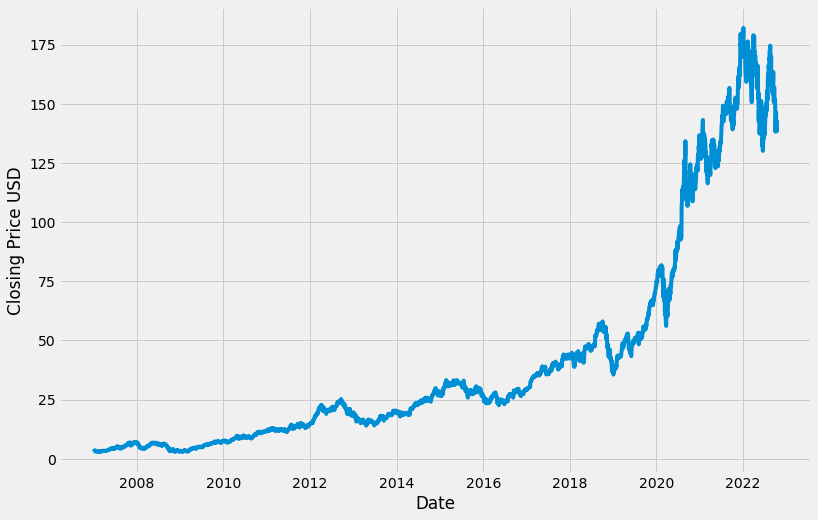

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Date'], df['Close'])
plt.ylabel('Closing Price USD')
plt.xlabel('Date')
plt.show()

In [ ]:
_ = df.filter(['Close'])
dataset = _.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

3180

In [ ]:
# Scale
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Train
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)

[array([0.00111596, 0.00148663, 0.00136506, 0.00144876, 0.00286364,
       0.00374646, 0.00350732, 0.00327217, 0.00376638, 0.00333793,
       0.00216617, 0.00205258, 0.00171181, 0.00149459, 0.00169388,
       0.0016042 , 0.00143083, 0.00154243, 0.0014647 , 0.00150058,
       0.00130329, 0.00130528, 0.00114386, 0.00118571, 0.00158427,
       0.00159025, 0.00101035, 0.00133119, 0.00129532, 0.00141489,
       0.00139695, 0.00132122, 0.00153445, 0.00219207, 0.00225385,
       0.00216617, 0.00205457, 0.00114187, 0.00127738, 0.00176562,
       0.0014368 , 0.00161815, 0.0019908 , 0.00189714, 0.00195294,
       0.00194696, 0.00232559, 0.00203265, 0.0023515 , 0.00226581,
       0.00226979, 0.00257668, 0.00264643, 0.00312271, 0.00314064,
       0.00305296, 0.00351728, 0.00343957, 0.00299716, 0.00309879])]
[0.0029313993397216288]


In [ ]:
# convert to numpy
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3120, 60, 1)

In [ ]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3120/3120 [==============================] - 91s 28ms/step - loss: 1.0429e-04


In [ ]:
# Create test set
test_data = scaled_data[training_data_len -60:, :]
# tests
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
# convert data to np.Array
x_test = np.array(x_test)
# Reshape => rows|cols|features
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# get predicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


25/25 [==============================] - 2s 17ms/step


In [ ]:
# Get RMSE 
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

0.874415251847351

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


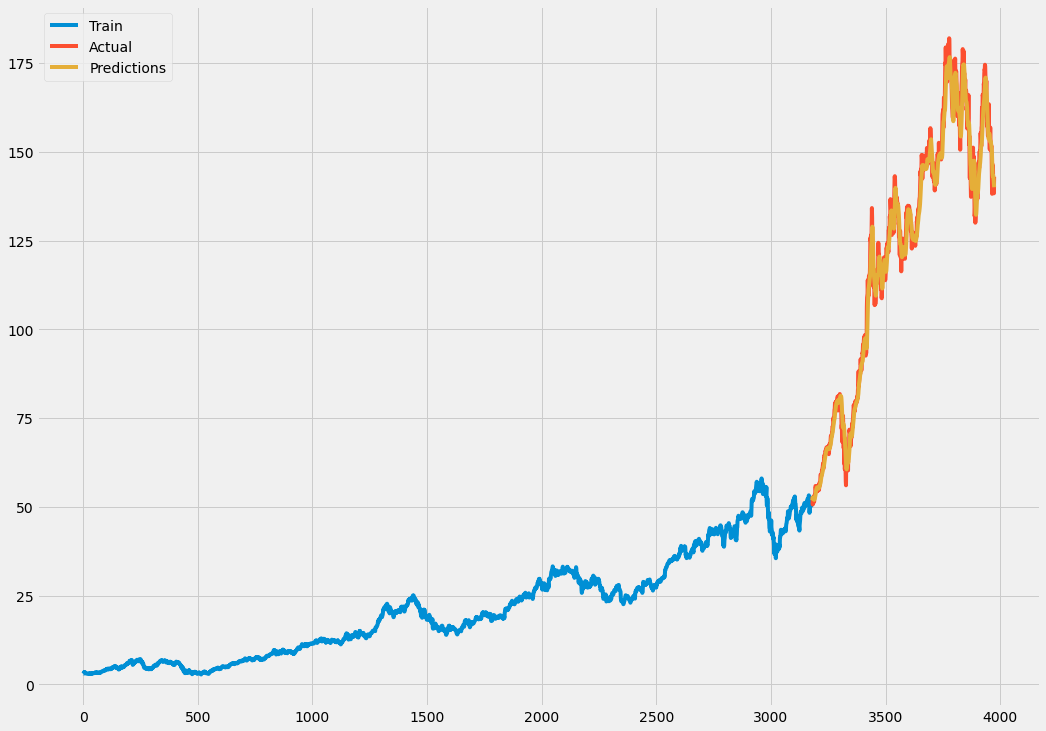

In [ ]:
train = _[:training_data_len]
valid = _[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'])
plt.show()

In [ ]:
valid['Diff'] = valid['Close'] - valid['Predictions']
valid.sort_values('Diff')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,Predictions,Diff
3444,112.820000,126.766060,-13.946060
3888,131.880005,144.503036,-12.623031
3867,142.559998,153.017319,-10.457321
3964,138.199997,148.542297,-10.342300
3887,137.130005,146.601318,-9.471313
...,...,...,...
3760,175.080002,163.414215,11.665787
3795,170.330002,158.650421,11.679581
3419,108.937500,96.742203,12.195297
3797,174.610001,162.324722,12.285279
